# PyTorch 60 题

#### 1

In [1]:
import torch

#### 2

In [2]:
x = torch.empty(5,3)
print(x)

tensor([[1.0653e-38, 1.0194e-38, 8.4490e-39],
        [1.0102e-38, 8.4490e-39, 9.6429e-39],
        [8.4490e-39, 9.6429e-39, 9.2755e-39],
        [1.0286e-38, 9.0919e-39, 8.9082e-39],
        [9.2755e-39, 8.4490e-39, 1.0194e-38]])


#### 3

In [3]:
x = torch.rand(5,3)
print(x)

tensor([[0.3756, 0.5636, 0.9596],
        [0.3562, 0.2676, 0.8324],
        [0.1331, 0.8942, 0.8871],
        [0.2006, 0.1771, 0.1161],
        [0.0051, 0.5321, 0.6614]])


#### 4

In [4]:
x = torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


#### 5

In [5]:
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


#### 6

In [6]:
x = torch.ones(5,3,dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


#### 7

In [7]:
x = torch.randn_like(x,dtype=torch.float)
print(x)


tensor([[ 0.3302, -0.7513,  0.2318],
        [ 0.1156, -1.2881, -0.1099],
        [-0.8707,  0.0108,  1.8588],
        [ 1.1653,  0.7024, -0.2520],
        [-1.0347, -0.0338, -1.4327]])


#### 8

In [8]:
print(x.size())

torch.Size([5, 3])


#### 9

In [11]:
y = torch.rand(5,3)
print(x+y)

tensor([[ 1.2612,  0.0843,  0.5098],
        [ 0.9415, -0.6839,  0.6398],
        [-0.1950,  0.5184,  2.0295],
        [ 2.0618,  1.0069,  0.4971],
        [-0.4857,  0.4139, -0.8208]])


#### 10

In [14]:
print(x[:,1])

tensor([-0.7513, -1.2881,  0.0108,  0.7024, -0.0338])


#### 11

In [15]:
x = torch.randn(4,4)
y = x.view(16)
print(x.size(),y.size())

torch.Size([4, 4]) torch.Size([16])


#### 12

In [16]:
y = x.view(2,8)
print(y)

tensor([[ 0.6302,  0.3446,  0.4983,  0.7438, -1.4859,  0.6043,  1.6269, -0.2117],
        [-1.6602,  1.5044, -0.2189, -0.5096,  1.3949, -0.5415, -1.5119, -0.9645]])


#### 13

In [17]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([1.0099])
1.0098731517791748


#### 14

In [21]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


#### 15

In [23]:

print(a.add(1))
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


#### 16

In [24]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


#### 17

In [25]:
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### 18

In [26]:
x = torch.ones(2,2,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


#### 19

In [27]:
y = x+2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


#### 20

In [28]:
z = y*y*3
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


#### 21

In [29]:
out.backward()

#### 22

In [31]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


#### 23

In [35]:
x = torch.randn(3,requires_grad= True)
y = x*2

while y.data.norm()<1000:
    y = y*2

print(y)
print(y.data)
print(y.data.norm())


tensor([-200.1039, -713.9232, -851.6977], grad_fn=<MulBackward0>)
tensor([-200.1039, -713.9232, -851.6977])
tensor(1129.2107)


#### 24

In [36]:
v = torch.tensor([0.1,1.0,0.0001],dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


#### 25

In [37]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print ((x**2).requires_grad)

True
True
False


In [38]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


#### 26

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120 )
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

net = Net()
print(net)




Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#### 37

In [54]:
params = list(net.parameters())
print(len(params))
# print(params)

10


#### 38

In [55]:
print(params[0].size())

torch.Size([6, 3, 5, 5])


#### 39

In [56]:
input = torch.randn(1,3,32,32)
out = net(input)
print(out)

tensor([[0.0116, 0.0000, 0.1321, 0.0000, 0.0000, 0.0000, 0.0000, 0.0228, 0.0483,
         0.0000]], grad_fn=<ReluBackward0>)


#### 40

In [57]:
net.zero_grad()

#### 41

In [47]:
out.backward(torch.randn(1,10))

#### 42

In [58]:
criterion = nn.MSELoss()

#### 43

In [59]:
target = torch.randn(10)
target = target.view(1,-1)
output = net(input)
loss = criterion(out,target)
print(loss)

tensor(1.6132, grad_fn=<MseLossBackward>)


#### 44

In [60]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None


#### 45

In [61]:
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([-0.0016, -0.0087, -0.0012,  0.0034,  0.0029, -0.0070])


#### 46

In [62]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr=0.01)

#### 47

In [64]:
optimizer.zero_grad()
output = net(input)
loss = criterion(output,target)
loss.backward()
optimizer.step()

#### 48

In [4]:
import torchvision
import torch
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader= torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,transform=transform,download=True) 
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


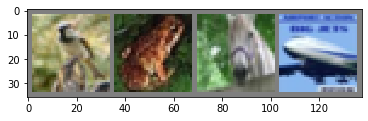

bird froghorseplane


In [10]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(''.join('%5s' % classes[labels[j]] for j in range(4)))


In [12]:
net2 = Net()

#### 49

In [13]:
criterion2 = nn.CrossEntropyLoss()

#### 50

In [14]:
import torch.optim as optim
optimizer2 = optim.SGD(net2.parameters(),lr=0.001,momentum=0.9)

#### 51

In [16]:
for epoch in range(2):
    running_loss = 0
    # print("epoch %d",epoch)

    for i,data in enumerate(trainloader,0):
        inputs,labels = data
        optimizer2.zero_grad()
        outputs = net2(inputs)
        loss = criterion2(outputs,labels)
        loss.backward()
        optimizer2.step()
        running_loss+=loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.263
[1,  4000] loss: 2.137
[1,  6000] loss: 1.895
[1,  8000] loss: 1.713
[1, 10000] loss: 1.610
[1, 12000] loss: 1.552
[2,  2000] loss: 1.470
[2,  4000] loss: 1.428
[2,  6000] loss: 1.400
[2,  8000] loss: 1.394
[2, 10000] loss: 1.367
[2, 12000] loss: 1.356
Finished Training


#### 56

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',' '.join('%5s' % classes[labels[j]] for j in range(4)))